<div id='inicio'></div>

# Projeto 2 - Ciência dos Dados

### Índice 

- [Primeiro Modelo - Aula 24](#modelo1)

- [Segundo Modelo - Árvore de Regressão](#modelo2)

___

## Onde queremos chegar?
  O projeto gira em torno do desafio de desenvolver um programa capaz de prever o preço que um novo carro chegando no mercado teria, a partir de suas caracteristicas mecânicas.
  
  Para isso, explicaremos detalhadamente todo o processo da construção do código e sua validação como um modelo funcional.

## 1. Importando, estabelecendo e limpando
Nesta primeira etapa, importamos a bibliotecas que serão utilizadas durante o projeto, definimos os tamanhos e caracerísticas que os gráficos gerados durante o trabalho terão, carregamos nossa base de dados "Car_sales.csv"para um variável em dataframe, e por último, fizemos limpezas convenientes em tal base de dados.


In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns
import matplotlib # importing library to change the default setting
import statsmodels.api as sm
from IPython.display import display
import scipy.stats
import os
# Definindo os parametros dos gráficos 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =8
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Data = pd.read_csv('Car_sales.csv')
Data_idx = Data.set_index('Model')
Data_idx.head(7)

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
Model,,,,,,,,,,,,,,,
Integra,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
TL,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
CL,Acura,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
RL,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
A4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
A6,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
A8,Audi,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858


In [46]:
Data.describe(include="all").head(7)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,157,157,157.000000,121.000000,157,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,157,155.000000
unique,30,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,NaN
top,Dodge,Neon,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/27/2011,NaN
freq,11,2,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
mean,NaN,NaN,52.998076,18.072975,NaN,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,NaN,77.043591
std,NaN,NaN,68.029422,11.453384,NaN,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,NaN,25.142664
min,NaN,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,NaN,23.276272


Pequenas análises importantes:

- Parece haver valores ausentes em algumas colunas (exemplo: __year_resale_value)
- Se considerarmos todas as colunas, teremos muitas variáveis fictícias

In [4]:
#Retirando colunas que não agregam ao Projeto
data_2 = Data.drop(['Vehicle_type','Latest_Launch'], axis = 1)
data_2.sort_values( by = 'Engine_size', ascending = False)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
39,Dodge,Viper,0.916,58.470,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,188.144323
24,Chevrolet,Corvette,17.947,36.225,45.705,5.7,345.0,104.5,73.6,179.7,3.210,19.1,22.0,141.141150
18,Cadillac,Escalade,14.785,NaN,46.225,5.7,255.0,117.5,77.0,201.2,5.572,30.0,15.0,109.509117
78,Lincoln,Navigator,22.925,NaN,42.660,5.4,300.0,119.0,79.9,204.8,5.393,30.0,15.0,123.972047
40,Dodge,Ram Pickup,227.061,15.060,19.460,5.2,230.0,138.7,79.3,224.2,4.470,26.0,17.0,90.211700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Mitsubishi,Mirage,26.232,8.325,13.987,1.8,113.0,98.4,66.5,173.6,2.250,13.2,30.0,45.832181
57,Honda,Civic,199.685,9.850,12.885,1.6,106.0,103.2,67.1,175.1,2.339,11.9,32.0,42.879097
62,Hyundai,Accent,41.184,5.860,9.699,1.5,92.0,96.1,65.7,166.7,2.240,11.9,31.0,36.672284
26,Chevrolet,Metro,21.855,5.160,9.235,1.0,55.0,93.1,62.6,149.4,1.895,10.3,45.0,23.276272


In [5]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Price_in_thousands   155 non-null    float64
 5   Engine_size          156 non-null    float64
 6   Horsepower           156 non-null    float64
 7   Wheelbase            156 non-null    float64
 8   Width                156 non-null    float64
 9   Length               156 non-null    float64
 10  Curb_weight          155 non-null    float64
 11  Fuel_capacity        156 non-null    float64
 12  Fuel_efficiency      154 non-null    float64
 13  Power_perf_factor    155 non-null    float64
dtypes: float64(12), object(2)
memory usage: 17.3+ KB


In [6]:
data_2.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Power_perf_factor       2
dtype: int64

Vemos que há alguns valores Nulos, então devemos limpar um pouco mais o Dataset para não cometer erros

In [7]:
df_limpo = data_2.dropna()

In [8]:
data_num = df_limpo.select_dtypes(include = ['float64', 'int64']);
data_num.head(9)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,18.780,23.555,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
6,1.380,39.000,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,134.656858
8,9.231,28.675,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,81.877069
9,17.527,36.125,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,83.998724
10,91.561,12.475,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,71.181451


Feita a limpeza para tirar todos os valores nulos do nosso dataframe, podemos inicar a Análise
___

## 2. Análise explanatória Básica

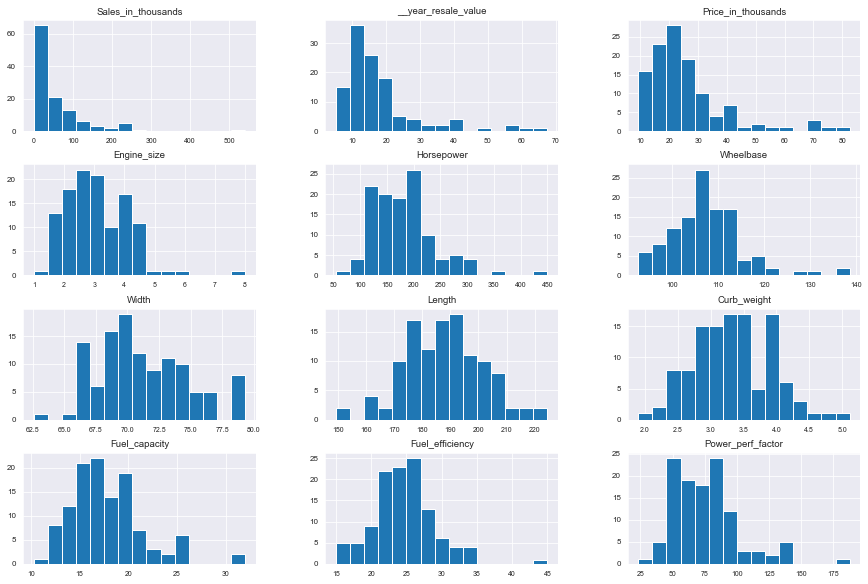

In [9]:
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (15,10)
data_num.hist(bins=15,xlabelsize=7);

Estabelecendo correlação dos parâmetros com o preço dos carros 

In [10]:
# Correlation with Price_in_thousands
df_corr = data_num.corr()['Price_in_thousands']
df_corr

Sales_in_thousands    -0.251705
__year_resale_value    0.954757
Price_in_thousands     1.000000
Engine_size            0.649170
Horsepower             0.853455
Wheelbase              0.067042
Width                  0.301292
Length                 0.182592
Curb_weight            0.511400
Fuel_capacity          0.406496
Fuel_efficiency       -0.479539
Power_perf_factor      0.905002
Name: Price_in_thousands, dtype: float64

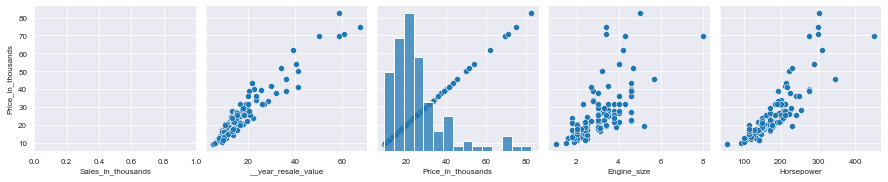

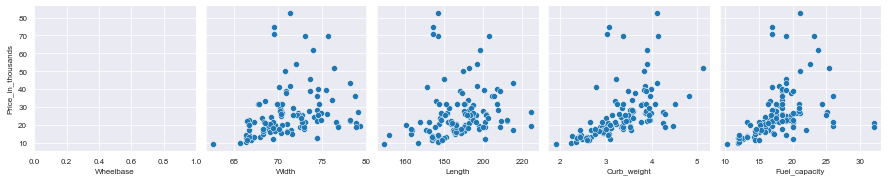

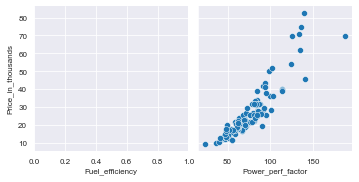

In [11]:
for i in range(0, len(data_num.columns),5):
    sns.pairplot(data_num, y_vars ='Price_in_thousands', x_vars = data_num.columns[i:i+5]  )

### Com isso podemos ver que:

- Sales_in_thousands    (-0.304734) --> **Correlação negativa e fraca**

- __year_resale_value   ( 0.953840) --> **Correlação positiva e forte**

- Engine_size           ( 0.626875) --> **Correlação positiva e forte**

- Horsepower            ( 0.839744) --> **Correlação positiva e forte**

- Wheelbase             ( 0.110513) --> **Correlação positiva e fraca**

- Width                 ( 0.329136) --> **Correlação positiva e fraca**

- Length                ( 0.156935) --> **Correlação positiva e fraca**

- Curb_weight           ( 0.526224) --> **Correlação positiva e fraca** 

- Fuel_capacity         ( 0.423282) --> **Correlação positiva e fraca** 

- Fuel_efficiency       (-0.492157) --> **Correlação negativa e fraca**

- Power_perf_factor     ( 0.905002) --> **Correlação positiva e forte**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


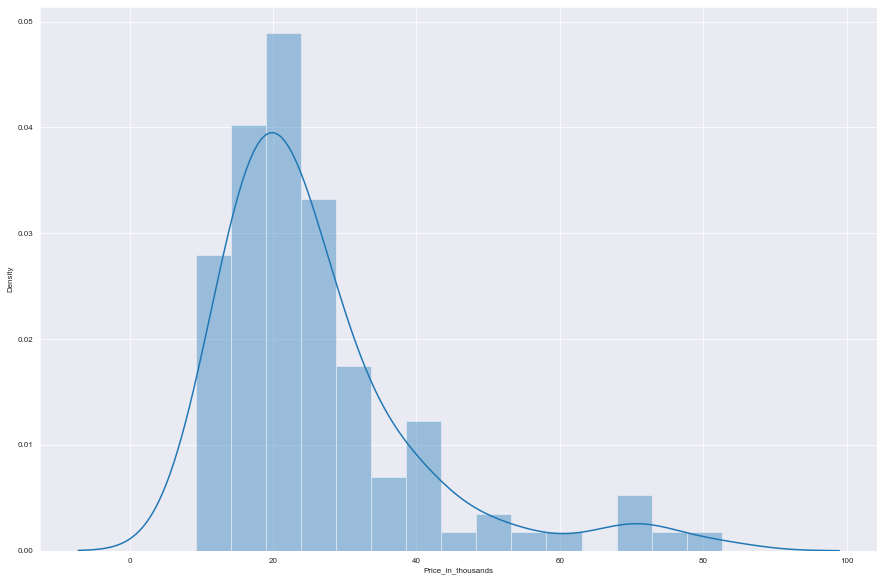

In [12]:
sns.distplot(data_num['Price_in_thousands']);

In [13]:
data_num.Price_in_thousands.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count    117.000000
mean      25.969487
std       14.149699
min        9.235000
25%       16.980000
50%       21.665000
75%       29.465000
85%       37.174600
90%       41.658000
100%      82.600000
max       82.600000
Name: Price_in_thousands, dtype: float64

### Inferência:

- O gráfico parecia **inclinado à direita**, o que significa que **a maioria dos preços no conjunto de dados é baixa** (abaixo de 30.000).

- Existe uma diferença significativa entre a média e a mediana da distribuição de preços.

- Os pontos de dados estão um pouco distantes da média, o que indica uma grande variação nos preços dos automóveis. (85% dos preços estão abaixo de 37.1746, enquanto os 15% restantes estão entre 37.1746 e 82.600).

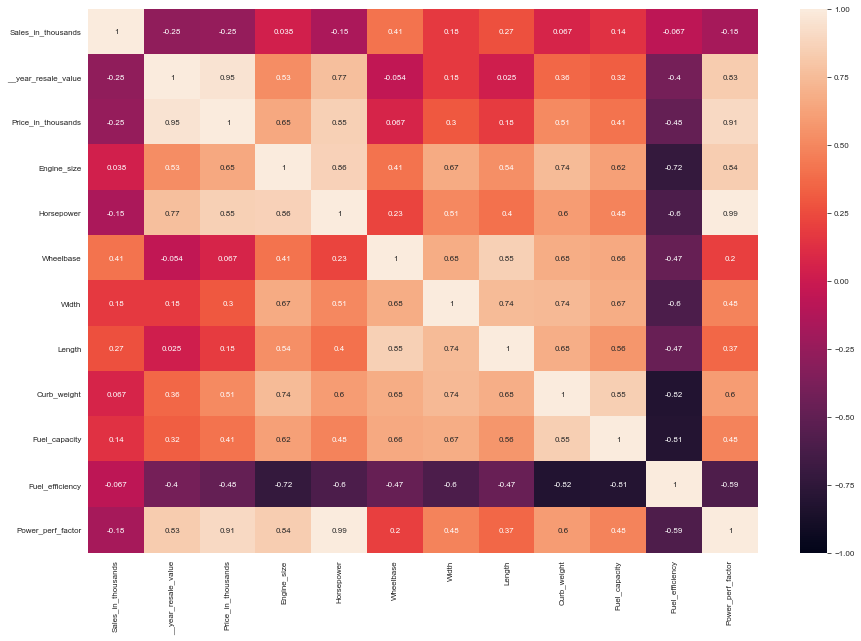

In [14]:
sns.heatmap(data_num.corr(), annot=True, vmin=-1, vmax=1);

A partir do mapa de calor podemos mapear as correlações entre todas as variáveis, e não apenas entre elas e o preço.

Dessa forma, podemos analisar melhor os dados e inclusive identificar futuros possíveis problemas, como a correlação entre "Horsepower" e "Power perf factor", de 0,99. Sabendo do que se trata cada variável, pode-se concluir que uma foi calculada a partir da outra.

<div id='modelo1'></div>

___
## 3. PRIMEIRA MODELAGEM --> Modelo da Aula 24

- [início](#inicio)

In [15]:
### Função utilitária para fazer a regressão com constante adicionada

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET - Preço)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES - Especificações)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

Passo 1: Ajustando o modelo

Ajuste do modelo considerando Preço como resposta (dependente) e as demais variáveis da base de dados como explicativas:


In [16]:
X = data_num[['Sales_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase',
              'Width', 'Length','Curb_weight','Fuel_capacity','Fuel_efficiency']]
Y = data_num['Price_in_thousands']

Nota-se que a coluna "Power perf factor" foi retirada da análise, justamente pela conclusão obtida a partir do `heatmap`. A correlação extremamente alta dela com "Horsepower" influenciaria os cálculos, dado que estaríamos utilizando duas variáveis praticamente iguais. 

In [17]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_in_thousands   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     53.36
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.54e-35
Time:                        08:31:13   Log-Likelihood:                -375.93
No. Observations:                 117   AIC:                             771.9
Df Residuals:                     107   BIC:                             799.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 22.9764     18.215      1.261      0.210     -13.133      59.086
Sales_in_thousands -3.689e-05      0.009     -0.004      0.997      -0.019       0.019
Engine_size           -4.7238      1.464     -3.227      0.002      -7.626      -1.822
Horsepower             0.2659      0.022     12.293      0.000       0.223       0.309
Wheelbase             -0.1035      0.182     -0.567      0.572      -0.465       0.258
Width                 -0.4165      0.299     -1.391      0.167      -1.010       0.177
Length                -0.2155      0.100     -2.158      0.033      -0.414      -0.018
Curb_weight           10.1626      2.583      3.935      0.000       5.043      15.282
Fuel_capacity          0.2923      0.352      0.831      0.408      -0.405       0.990
Fuel_efficiency        0.4738      0.278      1.705      0.091      -0.077       1.025
==============================================================================
Omnibus:                       36.464   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.214
Skew:                           1.230   Prob(JB):                     1.40e-18
Kurtosis:                       6.288   Cond. No.                     9.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X2 = data_num [[ 'Engine_size', 'Horsepower', 'Wheelbase','Width', 'Length','Curb_weight','Fuel_capacity','Fuel_efficiency']]

results2 = regress(Y,X2)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_in_thousands   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     60.59
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.91e-36
Time:                        08:31:13   Log-Likelihood:                -375.93
No. Observations:                 117   AIC:                             769.9
Df Residuals:                     108   BIC:                             794.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              22.9847     18.008      1.276      0.205     -12.709      58.679
Engine_size        -4.7252      1.414     -3.342      0.001      -7.528      -1.923
Horsepower          0.2659      0.021     12.817      0.000       0.225       0.307
Wheelbase          -0.1038      0.171     -0.605      0.546      -0.444       0.236
Width              -0.4165      0.298     -1.397      0.165      -1.007       0.174
Length             -0.2155      0.099     -2.170      0.032      -0.412      -0.019
Curb_weight        10.1651      2.486      4.089      0.000       5.237      15.093
Fuel_capacity       0.2923      0.350      0.835      0.406      -0.402       0.986
Fuel_efficiency     0.4739      0.276      1.720      0.088      -0.072       1.020
==============================================================================
Omnibus:                       36.467   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.224
Skew:                           1.230   Prob(JB):                     1.40e-18
Kurtosis:                       6.288   Cond. No.                     9.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X3 = data_num [[ 'Engine_size', 'Horsepower', 'Length','Curb_weight']]

results3 = regress(Y,X3)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_in_thousands   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     119.0
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.20e-39
Time:                        08:31:13   Log-Likelihood:                -378.54
No. Observations:                 117   AIC:                             767.1
Df Residuals:                     112   BIC:                             780.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          19.4472      8.804      2.209      0.029       2.003      36.891
Engine_size    -5.8189      1.322     -4.401      0.000      -8.438      -3.199
Horsepower      0.2732      0.020     13.752      0.000       0.234       0.313
Length         -0.2785      0.058     -4.789      0.000      -0.394      -0.163
Curb_weight     8.1303      1.694      4.799      0.000       4.774      11.487
==============================================================================
Omnibus:                       40.019   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.338
Skew:                           1.320   Prob(JB):                     7.30e-22
Kurtosis:                       6.605   Cond. No.                     4.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

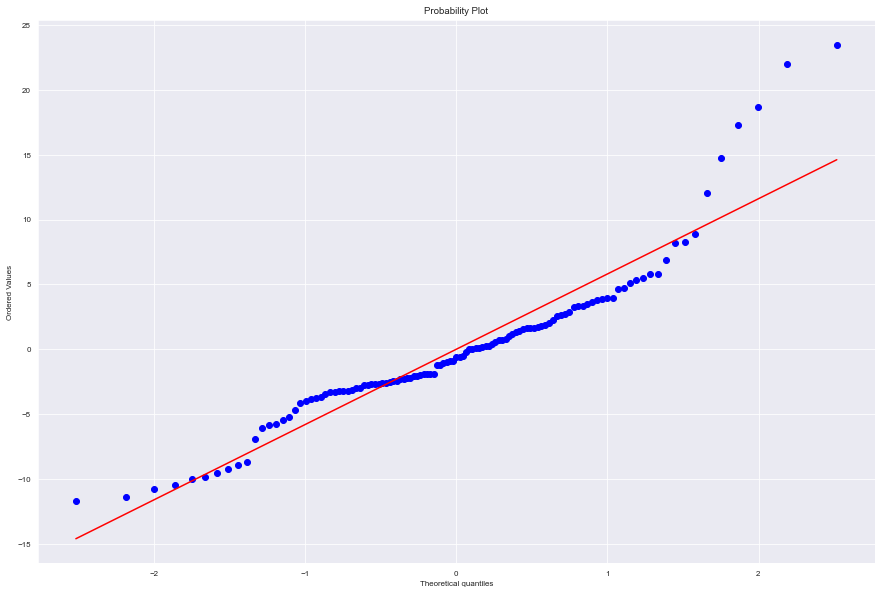

In [20]:
from scipy.stats import norm, probplot
scipy.stats.probplot(results.resid, dist= 'norm', plot =plt);

In [21]:
print (results.predict)

<bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x7fc08ad86a90>>


In [22]:
data_num['log_engine'] = np.log(data_num[ 'Engine_size'])
data_num['log_horsepower'] = np.log(data_num[ 'Horsepower'])
data_num['log_length'] = np.log(data_num[ 'Length'])
data_num['log_curb'] = np.log(data_num['Curb_weight'])




X3 = data_num [[ 'log_engine', 'log_horsepower', 'log_length','log_curb']]

results3 = regress(Y,X3)
results3.summary()

<ipython-input-22-0fec8464addd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['log_engine'] = np.log(data_num[ 'Engine_size'])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_in_thousands   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     74.93
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           9.11e-31
Time:                        08:31:13   Log-Likelihood:                -399.37
No. Observations:                 117   AIC:                             808.7
Df Residuals:                     112   BIC:                             822.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            108.7297     69.707      1.560      0.122     -29.385     246.845
log_engine       -10.2922      5.403     -1.905      0.059     -20.998       0.413
log_horsepower    47.1789      4.659     10.126      0.000      37.948      56.410
log_length       -63.7042     13.216     -4.820      0.000     -89.890     -37.518
log_curb          15.5380      7.507      2.070      0.041       0.664      30.412
==============================================================================
Omnibus:                       43.251   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.716
Skew:                           1.519   Prob(JB):                     7.36e-21
Kurtosis:                       6.128   Cond. No.                         775.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
targets = data_num['Price_in_thousands']
inputs = data_num[[ 'Engine_size', 'Horsepower', 'Length','Curb_weight']]

### Escalando os dados - Usando sklearn

In [24]:
from sklearn.preprocessing import StandardScaler

targets = data_num['Price_in_thousands']
inputs = data_num[[ 'Engine_size', 'Horsepower', 'Length','Curb_weight']]


Usando treino e teste 

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(inputs,targets,test_size = 0.2, random_state=40)

Criando a regressão

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
LinearRegression()

# Construindo então regressão Linear
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X3, Y);

reg.score(X3, Y)

# TESTE

0.7279702865357354

Usando a função predict para prever os valores de x

In [27]:
y_hat = model.predict(x_train)

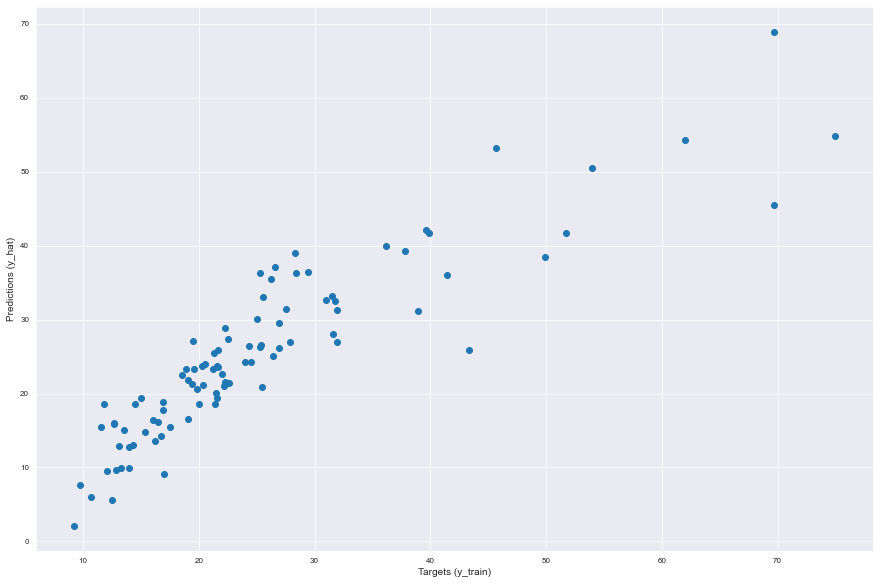

In [28]:
plt.scatter(y_train,y_hat)
plt.xlabel("Targets (y_train)", size = 10)
plt.ylabel("Predictions (y_hat)", size = 10)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF')

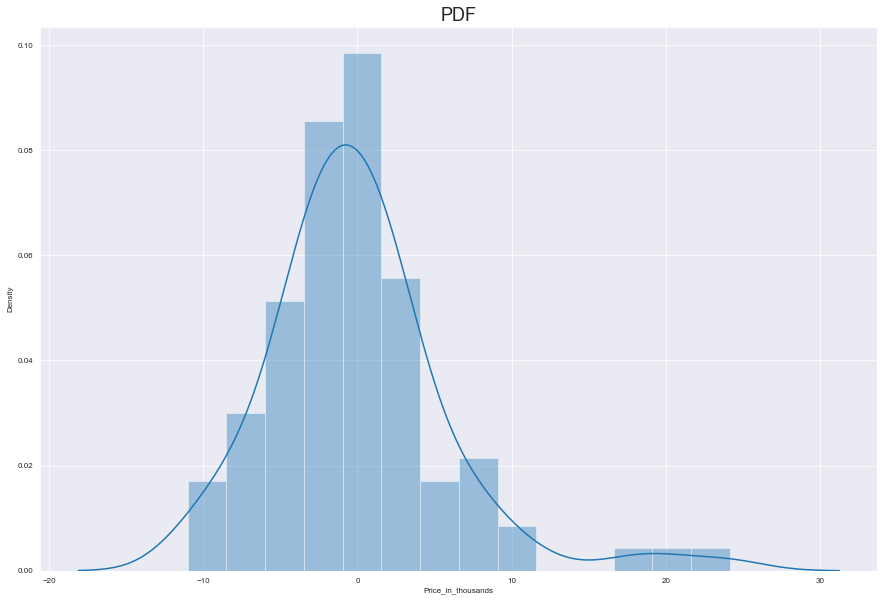

In [29]:
sns.distplot(y_train - y_hat)
plt.title("PDF", size = 18)

In [30]:
model.score(x_train, y_train)

0.8061554379258836

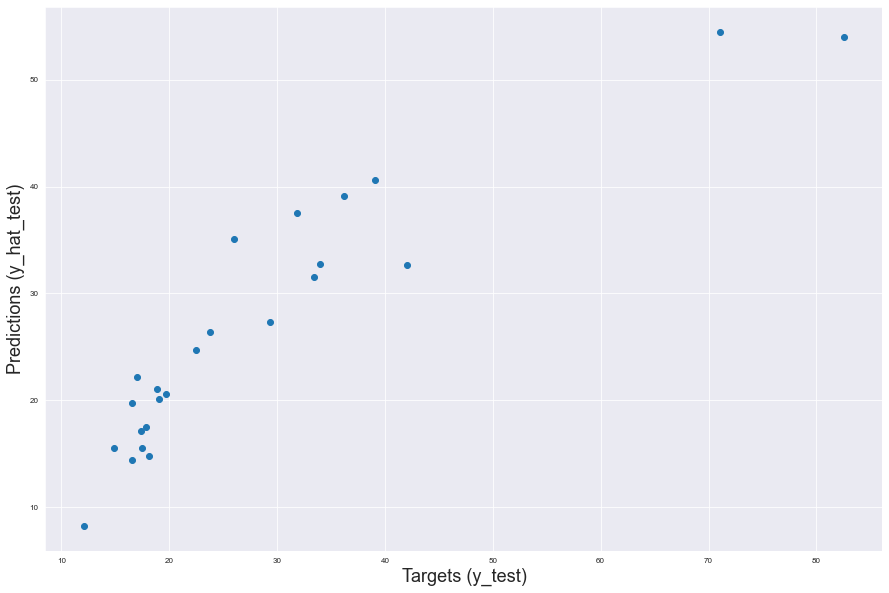

In [31]:
#predict the values for the training dataset
y_hat_test = model.predict(x_test)
plt.scatter(y_test,y_hat_test)
plt.xlabel("Targets (y_test)", size = 18)
plt.ylabel("Predictions (y_hat_test)", size = 18)
plt.show()

In [43]:
df_pf = pd.DataFrame(y_hat_test,columns=['Predicted Sale Price'])
df_pf.head()

,Predicted Sale Price
0,53.963602
1,35.123854
2,31.579191
3,8.266232
4,26.402607


In [44]:
y_test = y_test.reset_index(drop=True)
df_pf['Actual Sale Price'] = y_test
df_pf.head()

,Predicted Sale Price,Actual Sale Price
0,53.963602,82.600
1,35.123854,26.000
2,31.579191,33.400
3,8.266232,12.050
4,26.402607,23.755


In [34]:
df_pf['Errors'] = df_pf['Actual Sale Price'] - df_pf['Predicted Sale Price']
df_pf['Difference%'] = np.absolute(df_pf['Errors']/df_pf['Actual Sale Price']*100)
df_pf.head(5)

,Predicted Sale Price,Actual Sale Price,Errors,Difference%
0,53.963602,82.600,28.636398,34.668763
1,35.123854,26.000,-9.123854,35.091747
2,31.579191,33.400,1.820809,5.451523
3,8.266232,12.050,3.783768,31.400567
4,26.402607,23.755,-2.647607,11.145474


In [35]:
df_pf.describe()

,Predicted Sale Price,Actual Sale Price,Errors,Difference%
count,24.000000,24.000000,24.000000,24.000000
mean,26.800873,28.218833,1.417960,13.953279
std,12.140490,17.212027,7.682575,10.718876
min,8.266232,12.050000,-9.123854,1.427094
25%,17.393622,17.464250,-2.343066,5.203733
50%,23.485513,21.115000,-0.208447,11.203340
75%,33.379618,33.537500,2.001931,20.357505
max,54.484783,82.600000,28.636398,35.091747


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


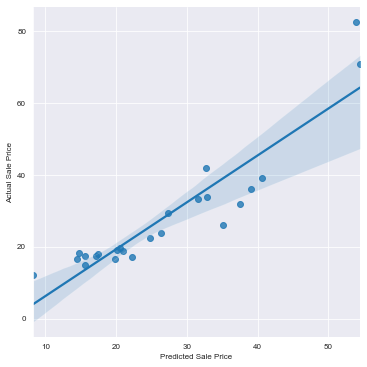

In [36]:
sns.lmplot('Predicted Sale Price','Actual Sale Price',data=df_pf)

### 2. Random Forest

- O Random Forest Classifier é um conjunto de árvores de decisão de um subconjunto do conjunto de treinamento selecionado aleatoriamente.
- Ele agrega os votos de diferentes árvores de decisão para decidir a classe final do objeto de teste.
- É um algoritmo de aprendizagem baseado em árvore de ensemble.
- Algoritmos de conjunto são aqueles que combinam mais de um algoritmo do mesmo tipo ou de tipo diferente para classificar objetos.
- É um dos algoritmos de aprendizagem mais precisos disponíveis. Para muitos conjuntos de dados, ele produz um classificador de alta precisão.
- Ele é executado de forma eficiente em grandes bancos de dados.
- Ele pode lidar com milhares de variáveis de entrada sem exclusão de variável.


In [37]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())

print(f'R² score: {r2_score(Y, rf_reg.predict(X))*100}')

R² score: 96.61213709557326


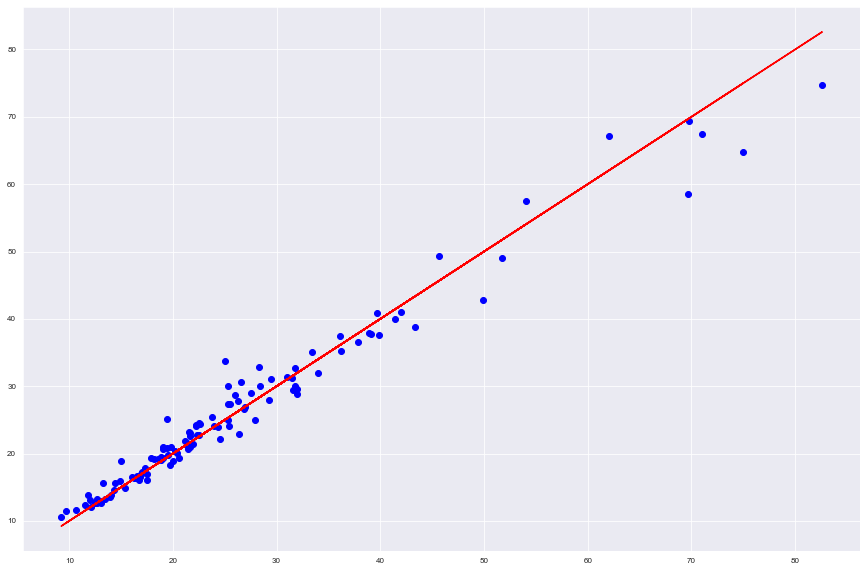

In [38]:
predictArray_rf = rf_reg.predict(X)
plt.scatter(Y,predictArray_rf, color="b")
plt.plot(Y,Y, color="r")

<div id='modelo2'></div>

___
## Modelo de Árvore de Regressão

- [início](#inicio)

Uma Árvore de Decisão/Regressão é uma árvore (e um tipo de gráfico acíclico direcionado) em que os nós representam decisões , transições aleatórias ou nós terminais, e as arestas ou ramos são binários (sim / não , verdadeiro / falso) representando caminhos possíveis de um nó para outro. O tipo específico de árvore de decisão usado para machine learning não contém transições aleatórias. Para usar uma árvore de decisão para classificação ou regressão, pega-se uma linha de dados ou um conjunto de recursos e começa na raiz e, em seguida, por meio de cada nó de decisão subsequente até o nó terminal. O processo é muito intuitivo e fácil de interpretar, o que permite que árvores de decisão treinadas sejam usadas para seleção de variáveis.

Para este modelo, vamos continuar utilizando os valores de:

- X : Colunas do dataframe que serão utilizadas como variáveis explicativas (FEATURES), no caso, as especificações dos carros

- Y : Coluna do dataframe referente à variável resposta (TARGET), no caso, o preço do carro. 

In [39]:
# Criando o objeto de 'DecisionTreeRegressor'
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor(random_state=0)

# Ajustando o módulo regressor ao nosso projeto

regressor.fit(X3, Y);

ValueError: x and y must be the same size

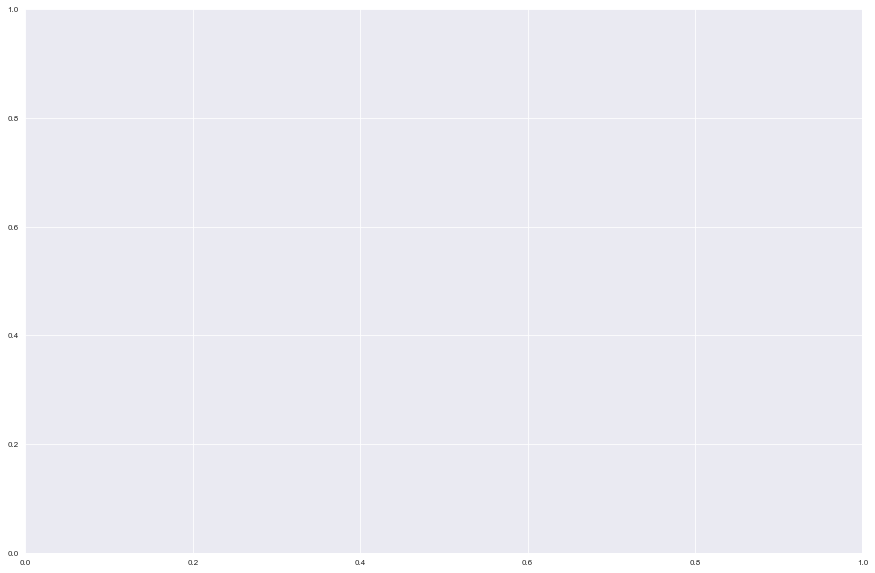

In [40]:
# Logo, vamos prever um novo resultado

plt.scatter(X3, Y, color='red')
plt.plot(X3, regressor.predict(X3), color='blue')
plt.show()